# Clase 7

El objetivo con esta sesión es entender las nociones básicas y metodología, para realizar una simulación de algún proceso de nuestra vida cotidiana o profesional. 

## Etapas para realizar un estudio de simulación

> - *Definición del sistema*: determinar la interacción del sistema con otros sistemas, restricciones, interacción e interrelación de variables de interés y los resultados esperados.
> - *Formulación de un modelo*: Es necesario definir todas las variables que forman parte del sistema y además definir un diagrama de flujo que describa la forma completa del modelo.
> - *Colección de datos*: Definir los datos necesarios para el modelo. Datos pueden provenir de registros contables, órdenes de trabajo, órdenes de compra, opiniones de expertos y si no hay otro remedio por experimentación.
> - *Validación*: En esta etapa es posible detectar deficiencias en la formulación del modelo o en los datos sumunistrados al modelo. Formas de validar un modelo son:
    - Opinión de expertos.
    - Exactitud con que se predicen datos hitóricos.
    - Exactitud de la predicción del futuro.
    - La aceptación y confianza en el modelo de la persona que hará uso de los resultados que arroje el experimento de simulación.
    
> - *Experimentación*: La experimentación con el modelo se realiza después de que éste ha sido validado. La experimentación consiste en generar los datos deseados y en realizar el análisis de sensibilidad de los índices requeridos.
> - *Interpretación*: Se interpretan los resultados que arroja la simulación y en base a esto se toma una decisión.
> - *Documentación*: 
    - Datos que debe de tener el modelo
    - Manual de usurario
        

# Casos positivos Covid-19 [fuente](https://ourworldindata.org/coronavirus-source-data)

In [20]:
# Importación de paquetes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as st

In [21]:
# Leer los datos del archivo covid_cases y quedarse únicamente con los datos de méxico
data = pd.read_csv('covid_cases.csv')
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116560,ZWE,Africa,Zimbabwe,2021-09-09,126056.0,125.0,134.000,4521.0,4.0,10.286,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
116561,ZWE,Africa,Zimbabwe,2021-09-10,126163.0,107.0,118.857,4532.0,11.0,10.714,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
116562,ZWE,Africa,Zimbabwe,2021-09-11,126220.0,57.0,113.571,4536.0,4.0,10.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
116563,ZWE,Africa,Zimbabwe,2021-09-12,126269.0,49.0,102.714,4538.0,2.0,8.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


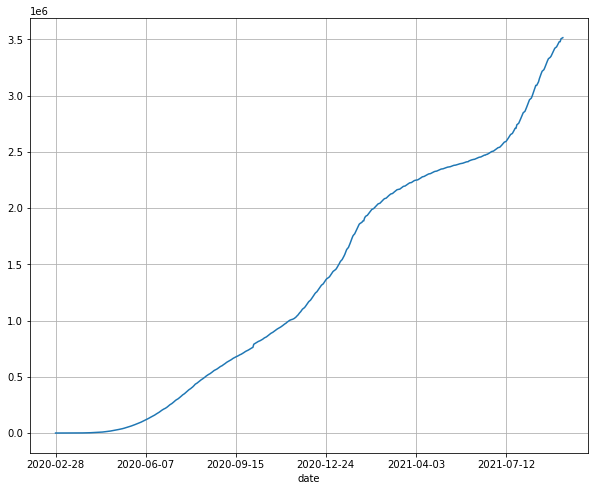

In [27]:
# Seleccionar únicamente los casos totales y graficarlos
data_mex = data[data['location'] == 'Mexico'].set_index('date')['total_cases'].dropna()
data_mex.plot(figsize=[10,8])
plt.grid()

<AxesSubplot:>

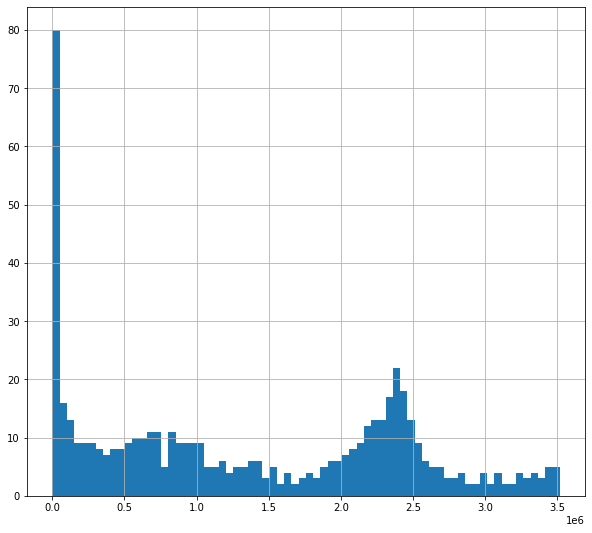

In [28]:
# Analizar los datos en el dominio de la frecuencia (histograma)
data_mex.hist(bins=70, figsize=[10, 9])

<AxesSubplot:>

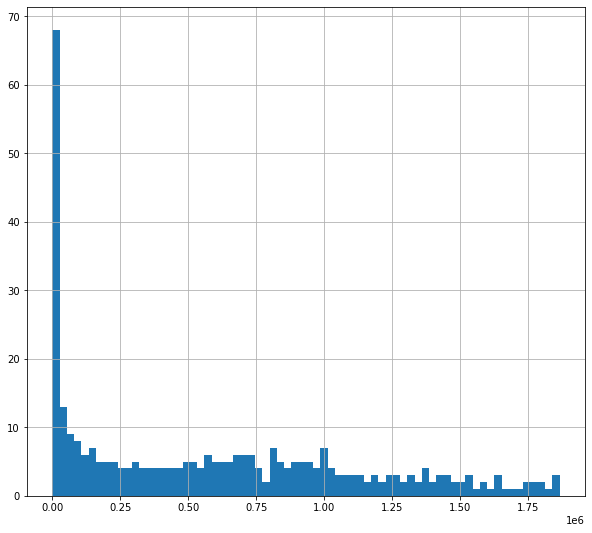

In [35]:
data_mex2 = data_mex[data_mex.index < '2021-02-01']
data_mex2.hist(bins=70, figsize=[10, 9])

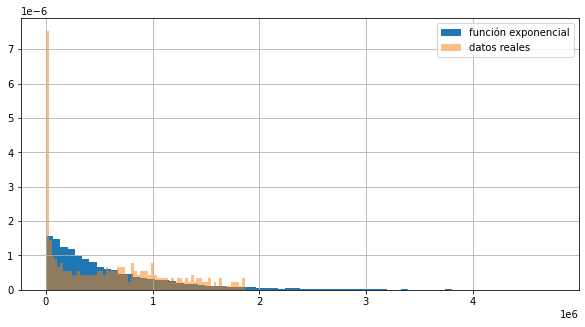

In [53]:
# Analizar el help de la función st.expon (paŕametros y método rvs)
# Generar 10**4 valores aleatorios de dicha distribución y luego comparar
# el histograma de los datos reales con los datos simulados
N = 10**4
args = st.expon.fit(data_mex2)

pred = st.expon(*args).rvs(N)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10, 5], )
ax.hist(pred, density=True, bins=70, label='función exponencial')

data_mex2.hist(bins=70, ax=ax, density=True, label='datos reales', alpha=0.5)

plt.legend()

In [55]:
pred.mean(), args[1]

(596842.354118474, 589009.4572271387)

## ¿Cómo usaríamos montecarlo para saber en un futuro cuantas personas es probable que se infecten?

In [66]:
escenarios, fecha_futura = 10000, 7
pred = pd.DataFrame(st.expon(*args).rvs([escenarios, fecha_futura]))
pred.mean(axis=0).cumsum()

0    5.922404e+05
1    1.195330e+06
2    1.788189e+06
3    2.369680e+06
4    2.958822e+06
5    3.549090e+06
6    4.139199e+06
dtype: float64

# Simular dado cargado

Suponga que tenemos un dado cargado que distribuye según un distribución de probabilidad binomial con parámetros `n=5`, `p=0.5`.

array([2, 3, 2, ..., 1, 3, 2])

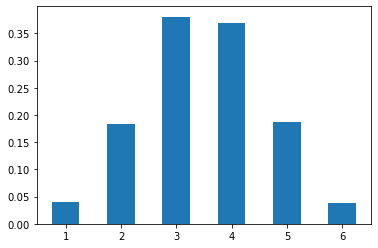

In [89]:
np.random.seed(344)
# Graficar el histograma de 1000 lanazamientos del dado

# Ejercicio

Si el usuario tira cualquier número entre 1 y 50, el casino gana. Si el usuario tira cualquier número entre 51 y 99, el usuario gana. Si el usuario tira 100, pierde.

In [55]:
# Solución


# Tarea

# 1
Como ejemplo simple de una simulación de Monte Carlo, considere calcular la probabilidad de una suma particular del lanzamiento de tres dados (cada dado tiene valores del uno al seis). Además cada dado tiene las siguientes carácterísticas: el primer dado no está cargado (distribución uniforme todos son equiprobables); el segundo y tercer dado están cargados basados en una distribución binomial con parámetros (`n=5, p=0.5` y `n=5, p=0.2`). Calcule la probabilidad de que la suma resultante sea 7, 14 o 18. 

In [53]:
# Solución


(0.127, 0.01352, 1e-05)

# 2 Ejercicio de aplicación- Cafetería Central

Premisas para la simulación:
- Negocio de alimentos que vende bebidas y alimentos.
- Negocio dentro del ITESO.
- Negocio en cafetería central.
- Tipo de clientes (hombres y mujeres).
- Rentabilidad del 60%.

## Objetivo
Realizar una simulación estimado el tiempo medio que se tardaran los clientes en ser atendidos entre el horario de 6:30 a 1 pm. Además saber el consumo. 
**Analizar supuestos y limitantes**

## Supuestos en simulación
Clasificación de clientes: 
- Mujer  = 1 $\longrightarrow$ aleatorio < 0.5
- Hombre = 0 $\longrightarrow$ aleatorio $\geq$ 0.5.

Condiciones iniciales:
- Todas las distrubuciones de probabilidad se supondrán uniformes.
- Tiempo de simulación: 6:30 am - 1:30pm $\longrightarrow$ T = 7 horas = 25200 seg.
- Tiempo de llegada hasta ser atendido: Min=5seg, Max=30seg.
- Tiempo que tardan los clientes en ser atendidos:
    - Mujer: Min = 1 min= 60seg, Max = 5 min = 300 seg
    - Hombre: Min = 40 seg, Max = 2 min= 120 seg
- Consumo según el tipo de cliente:
    - Mujer: Min = 30 pesos, Max = 100 pesos
    - Hombre: Min = 20 pesos, Max = 80 pesos

Responder las siguientes preguntas basados en los datos del problema:
1. ¿Cuáles fueron los gastos de los hombres y las mujeres en 5 días de trabajo?.
2. ¿Cuál fue el consumo promedio de los hombres y mujeres?
3. ¿Cuál fue el número de personas atendidas por día?
4. ¿Cuál fue el tiempo de atención promedio?
5. ¿Cuánto fue la ganancia promedio de la cafetería en 5 días de trabajo y su respectiva rentabilidad?

In [54]:
################## Datos del problema
d = 5
T =25200
T_at_min = 5; T_at_max = 30
T_mujer_min =60; T_mujer_max = 300
T_hombre_min = 40; T_hombre_max = 120
C_mujer_min = 30; C_mujer_max = 100
C_hombre_min = 20; C_hombre_max = 80
